# statsmodels

#### Alberto Torres Barrán

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)
print('Seaborn version', sns.__version__)

%matplotlib inline

Numpy version 1.15.4
Pandas version 0.23.4
Seaborn version 0.9.0


`statsmodels` es un módulo de Python que proporciona clases y funciones para ajustar distintos modelos estadísticos. Una de sus características principales es que proporciona una API para ajustar dichos modelos usando [fórmulas](https://www.statsmodels.org/dev/example_formulas.html) similares a las del lenguaje R (internamente usa el paquete `patsy` para convertir las fórmulas y los datos a las matrices necesarias).

[Documentación](http://www.statsmodels.org/devel/)    
[Ejemplos](https://www.statsmodels.org/stable/examples/index.html)

### Modelos lineales

Fórmula de la regresión lineal:
$$y = a + x_1b_1 + x_2b_2 + \dots + x_pb_p$$

Este modelo se representa en `statsmodels` con la fórmula `y ~ 1 + x_1 + x_2 + ... + x_p` donde tanto `y` como las `x` son nombre de las columnas de un DataFrame.

En `statsmodels` se utilizan los términos **endógena**, para la variable que están a la izquierda de la fórmula, y **exógena**, para las que están a la derecha. La siguiente tabla resume otros términos que se usan comunmente para referirse a las mismas variables:

| Endog(enous)         | Exog(enous)              |
|----------------------|--------------------------|
| y                    | x                        |
| lado izquierdo       | lado derecho             |
| variable dependiente | variables independientes |
| respuesta            | variables explicativas   |




In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


cars = sm.datasets.get_rdataset('cars')
cars.data.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


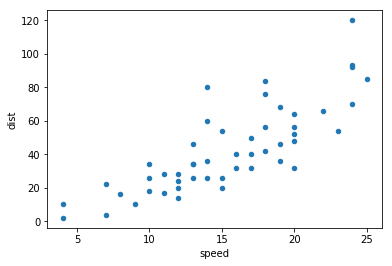

In [11]:
cars.data.plot(x='speed', y='dist', kind='scatter');

In [12]:
model = smf.ols('dist ~ speed + 1', data=cars.data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           1.49e-12
Time:                        21:14:16   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

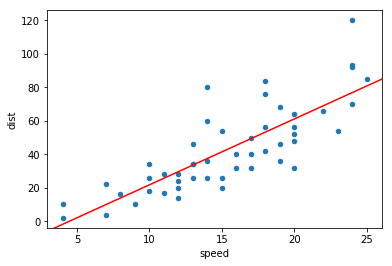

In [13]:
ax = cars.data.plot(x='speed', y='dist', kind='scatter')
sm.graphics.abline_plot(model_results=model, ax=ax, color='red');

El objeto que devuelve `fit()` es de la clase `RegressionResults`. Se puede consultar la documentación de todos los métodos [aquí](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults)

### Variables categóricas

In [14]:
brain = pd.read_csv('../data/brain_size.csv', sep=';', index_col=0, na_values='.')

In [15]:
brain.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


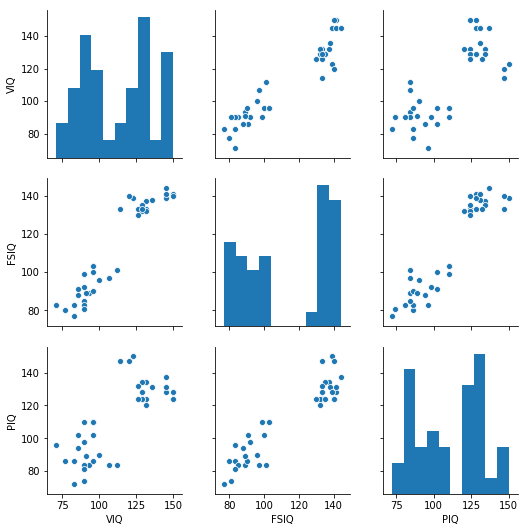

In [16]:
#pd.plotting.scatter_matrix(brain[['VIQ', 'FSIQ', 'PIQ']])
sns.pairplot(brain[['VIQ', 'FSIQ', 'PIQ']]);

In [17]:
brain.drop(columns='Gender').corr()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


Vamos a ajustar un modelo de la variable `VIQ` sobre `Gender`

In [18]:
model = smf.ols('VIQ ~ Gender', data=brain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Tue, 18 Dec 2018   Prob (F-statistic):              0.445
Time:                        21:14:19   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.619      0.000      98.704     120.196
Gender[T.Male]     5.8000      7.507      0.773      0.445      -9.397      20.997
==============================================================================
Omnibus:                       26.188   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.703
Skew:                           0.010   Prob(JB):                        0.157
Kurtosis:                       1.510   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En este caso, la variable `Gender` es una variable categórica, ya que solo tiene dos valores posibles, y está representada como una columna de tipo `object`. La interfaz de fórmula de `statsmodels` automáticamente la transforma en numérica usando la codificación más habitual: codificación ['dummy'](https://en.wikiversity.org/wiki/Dummy_variable_(statistics)) o codificación 'one-hot'.

Esta codificación convierte una variable categórica con $k$ valores distintos en $k-1$ nuevas variables binarias, ya que una de ellas queda perfectamente definida por el resto. Sin embargo, hay más codificaciones posibles: http://www.statsmodels.org/devel/contrasts.html

In [19]:
brain.dtypes

Gender        object
FSIQ           int64
VIQ            int64
PIQ            int64
Weight       float64
Height       float64
MRI_Count      int64
dtype: object

Si la variable fuera numérica (entero) y queremos forzar que la interfaz de fórmula la trate como una variable categórica podemos usar la fórmula `VIQ ~ C(Gender)`

Para ver lo que está pasando, esta misma transformación se puede realizar de forma manual con las funciones `sm.categorical()` o bien `pd.get_dummies()`.

In [20]:
#sm.categorical(brain['Gender'].values)
pd.get_dummies(brain)

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,Gender_Female,Gender_Male
1,133,132,124,118.0,64.5,816932,1,0
2,140,150,124,NaN,72.5,1001121,0,1
3,139,123,150,143.0,73.3,1038437,0,1
4,133,129,128,172.0,68.8,965353,0,1
5,137,132,134,147.0,65.0,951545,1,0
6,99,90,110,146.0,69.0,928799,1,0
7,138,136,131,138.0,64.5,991305,1,0
8,92,90,98,175.0,66.0,854258,1,0
9,89,93,84,134.0,66.3,904858,0,1
10,133,114,147,172.0,68.8,955466,0,1


Para ajustar el mismo modelo que antes pero indicando explicitamente la matriz $X$ y el vector $y$, tenemos que añadir además una columna de 1s que representan el término constante:

In [21]:
X = sm.add_constant(pd.get_dummies(brain['Gender'], drop_first=True))
y = brain['VIQ']

In [22]:
model1 = sm.OLS(endog=y, exog=X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Tue, 18 Dec 2018   Prob (F-statistic):              0.445
Time:                        21:14:19   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.4500      5.308     20.619      0.000      98.704     120.196
Male           5.8000      7.507      0.773      0.445      -9.397      20.997
==============================================================================
Omnibus:                       26.188   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.703
Skew:                           0.010   Prob(JB):                        0.157
Kurtosis:                       1.510   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Ejercicio wages

### Modelos lineales generalizados

Generalización de la regresión lineal que permite distribuciones de los errores distintas de la Gaussiana.

La fórmula del modelo es:
$$y = g^{-1}(a + x_1b_1 + x_2b_2 + \dots + x_3b_3)$$

Donde $g(\cdot)$ se conoce con el nombre de función de enlace y depende de la distribución que asumimos para la salida.

Un ejemplo es la regresión logística, que se usa cuando $y$ es una variable categórica binaria (distribución de Bernulli). Cada distribución tiene una función de enlace canónica que se usa por defecto; en el caso de la Bernulli es la función logística $$g^{-1}(\sigma) = \frac{1}{1 + \exp(-\sigma)}$$

Para este ejemplo vamos a trabajar con datos de [enfermedades cardíacas](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names):

In [23]:
import pandas as pd
import numpy as np

heart = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                    'heart-disease/processed.cleveland.data',
                    header=None,
                    na_values='?',
                    usecols=[0, 1, 2, 3, 4, 13],
                    names=['age', 'sex', 'chest_pain_type', 'rest_blood_pressure', 
                           'cholesterol', 'diagnosis'],
                    dtype={'sex': int, 'chest_pain_type': int, 'diagnosis': int})

In [24]:
heart['sex'] = (heart['sex'].astype('category')
                            .cat.rename_categories({
                                0: 'female', 
                                1: 'male'
                            }))

heart['chest_pain_type'] = (heart['chest_pain_type'].astype('category')
                                                    .cat.rename_categories({
                                                        1: 'typical angina', 
                                                        2: 'atypical angina',
                                                        3: 'non-anginal pain',
                                                        4: 'asymptomatic'
                                                    }))

heart['diagnosis'] = np.where(heart['diagnosis'].isin([1, 2, 3, 4]), 1, 0)

In [25]:
heart.head()

,age,sex,chest_pain_type,rest_blood_pressure,cholesterol,diagnosis
0,63.0,male,typical angina,145.0,233.0,0
1,67.0,male,asymptomatic,160.0,286.0,1
2,67.0,male,asymptomatic,120.0,229.0,1
3,37.0,male,non-anginal pain,130.0,250.0,0
4,41.0,female,atypical angina,130.0,204.0,0


In [27]:
model2 = smf.glm(formula='diagnosis ~ age + sex + chest_pain_type +' 
                         'rest_blood_pressure + cholesterol', 
                data=heart, family=sm.families.Binomial()).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  303
Model:                            GLM   Df Residuals:                      295
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -143.08
Date:                Tue, 18 Dec 2018   Deviance:                       286.15
Time:                        21:14:47   Pearson chi2:                     301.
No. Iterations:                     5   Covariance Type:             nonrobust
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -9.2910      1.761     -5.277      0.000     -12.742      -5.840
sex[T.male]                             1.9397      0.368      5.274      0.000       1.219       2.661
chest_pain_type[T.atypical angina]     -0.1107      0.642     -0.172      0.863      -1.368       1.147
chest_pain_type[T.non-anginal pain]     0.0541      0.578      0.094      0.925      -1.079       1.187
chest_pain_type[T.asymptomatic]         2.4527      0.558      4.392      0.000       1.358       3.547
age                                     0.0542      0.018      2.947      0.003       0.018       0.090
rest_blood_pressure                     0.0184      0.009      2.147      0.032       0.002       0.035
cholesterol                             0.0046      0.003      1.562      0.118      -0.001       0.010
=======================================================================================================
"""

Calculamos los [odds ratio](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/):

In [28]:
np.exp(model2.params)

Intercept                               0.000092
sex[T.male]                             6.956862
chest_pain_type[T.atypical angina]      0.895227
chest_pain_type[T.non-anginal pain]     1.055617
chest_pain_type[T.asymptomatic]        11.619280
age                                     1.055730
rest_blood_pressure                     1.018578
cholesterol                             1.004569
dtype: float64

In [29]:
np.exp(model2.conf_int())

,0,1
Intercept,0.000003,0.002908
sex[T.male],3.383256,14.305134
chest_pain_type[T.atypical angina],0.254507,3.148955
chest_pain_type[T.non-anginal pain],0.339949,3.277927
chest_pain_type[T.asymptomatic],3.889015,34.715132
age,1.018330,1.094504
rest_blood_pressure,1.001603,1.035840
cholesterol,0.998840,1.010331


#### Ejercicio binary